# Cleaning & Normalization
---

## Remove useless column

In [160]:
import pandas as pd

df = pd.read_csv("../data/raw_data.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Handle missing values 

In [161]:
import numpy as np
from sklearn.impute import KNNImputer
import numpy as np

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

## KNN Imputation for Missing Values

In [162]:
numeric_cols = [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

numeric_df = df[numeric_cols]

imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(numeric_df)

df[numeric_cols] = pd.DataFrame(imputed_data, columns=numeric_cols)

## Detect outliers IQR

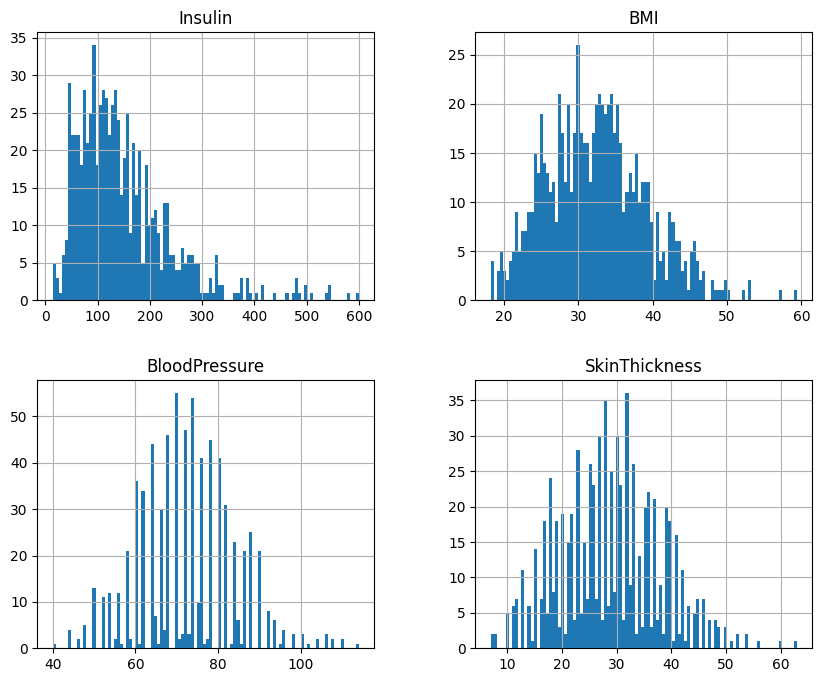

In [163]:
import matplotlib.pyplot as plt

insulin_max = 650
bmi_max = 65
bloodP_max = 120
bloodP_min = 40
skinthick_max = 65

df = df[
    (df['Insulin'] <= insulin_max) &
    (df['BMI'] <= bmi_max) &
    (df['BloodPressure'] <= bloodP_max) &
    (df['BloodPressure'] >= bloodP_min) &
    (df['SkinThickness'] <= skinthick_max)
]

df[[
    'Insulin',
    'BMI',
    'BloodPressure',
    'SkinThickness'
        ]].hist(bins=100, figsize=(10,8))


plt.show()





## standardize numerical features.

In [164]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.628456,0.876830,-0.039615,0.684233,0.669818,0.184159,0.480665,1.430041
1,-0.853714,-1.210994,-0.555560,0.027134,-0.826862,-0.862642,-0.366041,-0.191010
2,1.221324,2.036733,-0.727541,0.070940,2.586890,-1.356134,0.618715,-0.105691
3,-0.853714,-1.078434,-0.555560,-0.629966,-0.595757,-0.638328,-0.930511,-1.044194
4,-1.150148,0.512290,-2.791321,0.684233,0.218613,1.604818,5.576238,-0.020373
...,...,...,...,...,...,...,...,...
763,1.814192,-0.680753,0.304349,2.107949,0.350673,0.079479,-0.918240,2.539181
764,-0.557280,0.015188,-0.211596,-0.191900,0.718240,0.662697,-0.399786,-0.532284
765,0.332022,-0.017952,-0.039615,-0.629966,-0.397667,-0.922460,-0.691225,-0.276328
766,-0.853714,0.147749,-1.071505,-0.892806,0.359477,-0.339242,-0.372176,1.174085


## Save the clean data

In [165]:
file_path = '../data/clean_data.csv' 

df.to_csv(
    file_path, 
    index=False, 
    encoding='utf-8' 
)

print(f"DataFrame successfully saved to {file_path}")

DataFrame successfully saved to ../data/clean_data.csv


## Visualize relationships with pairplots.

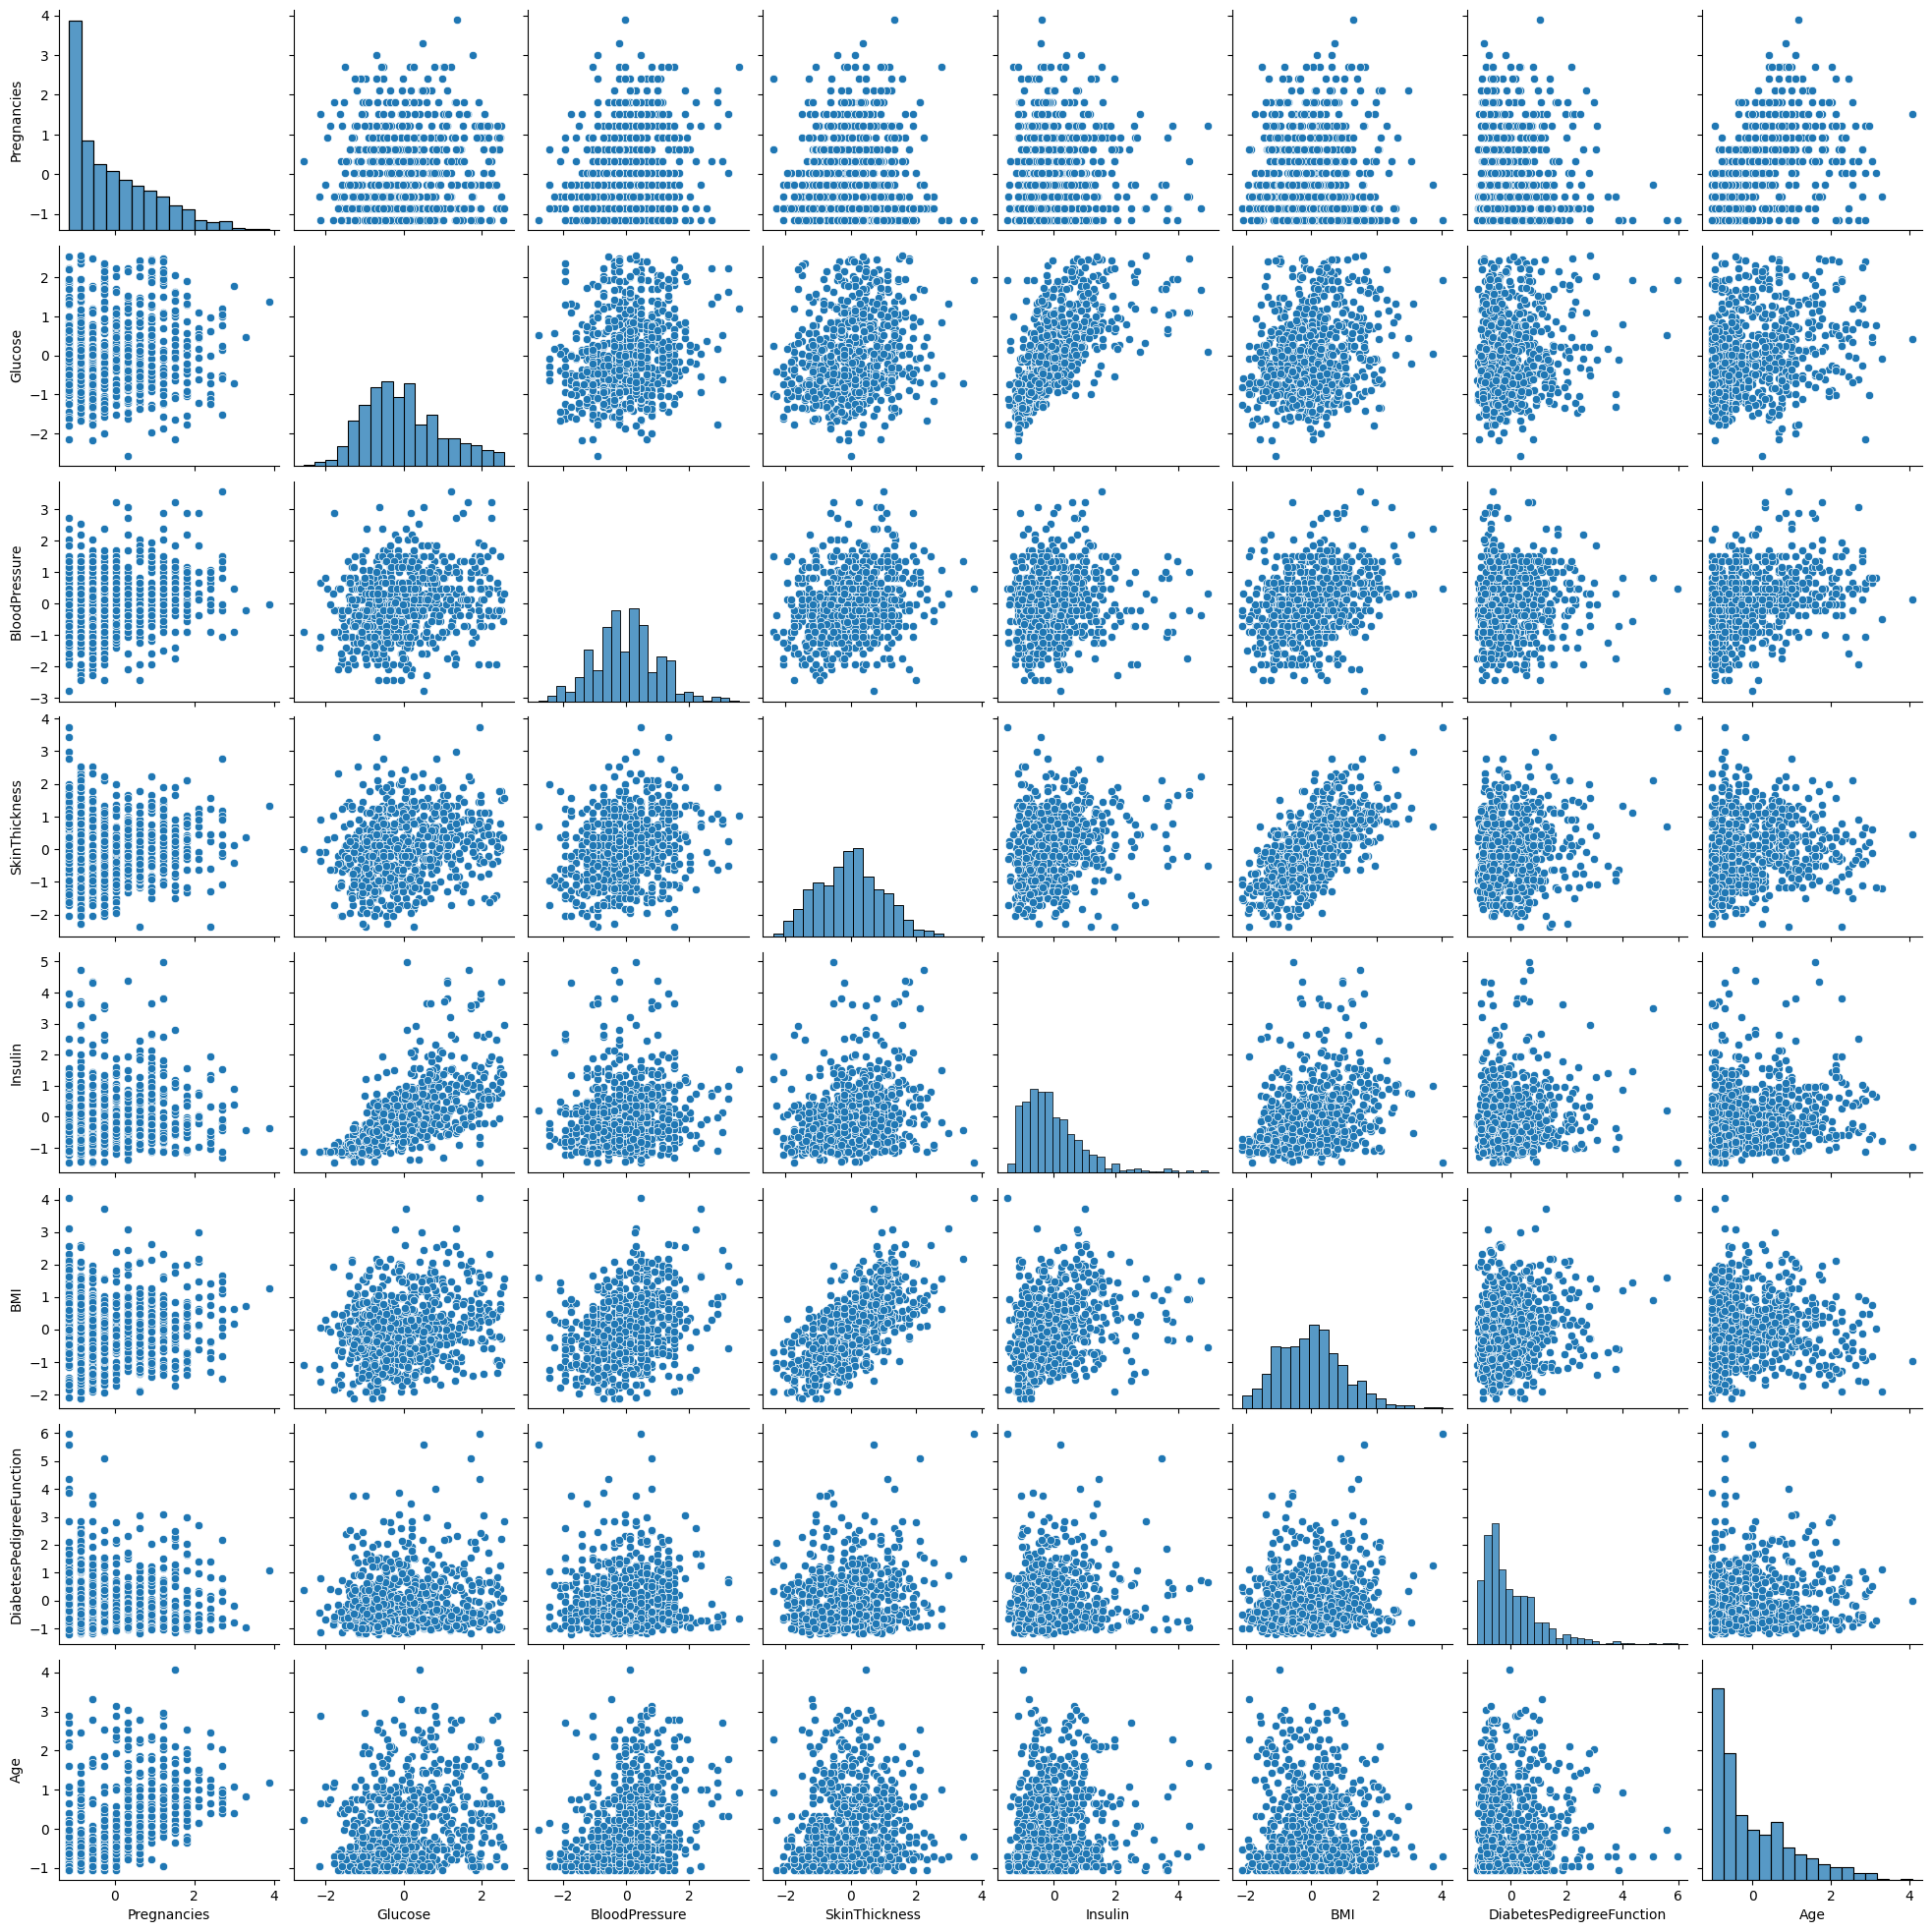

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

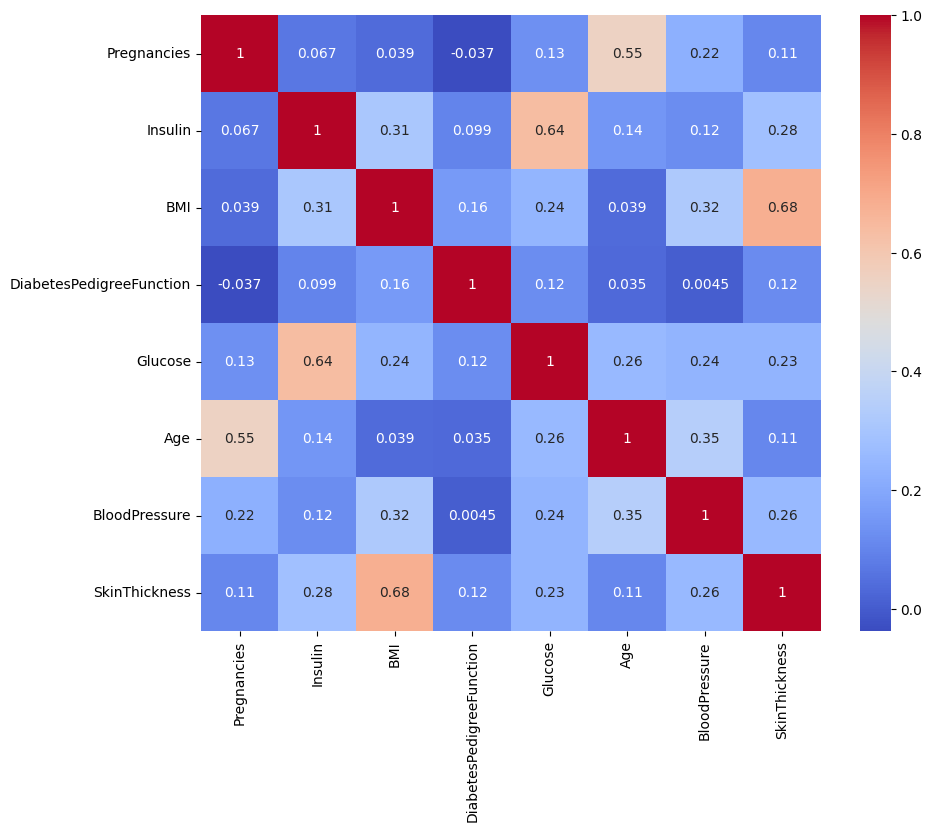

In [167]:
numeric_df = df[[
    'Pregnancies',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction', 
    'Glucose',
    'Age',
    'BloodPressure',
    'SkinThickness'
        ]]

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()